# ARMA Models - Lab

## Introduction

In this lab, you'll practice your knowledge the Autoregressive (AR), the Moving Average (MA) model, and the combined ARMA model.

## Objectives

You will be able to:
- Understand and explain what a Autoregressive model is
- Understand and explain what a Moving Average model is
- Understand and apply the mathematical formulations for Autoregressive and Moving Average models
- Understand how AR and MA can be combined in ARMA models

## Generate an AR model of the first order with $\phi = 0.7$

In [1]:
#import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Recall that the AR model has the following formula:

$$Y_t = \mu + \phi * Y_{t-1}+\epsilon_t$$

This means that:

$$Y_1 = \mu + \phi * Y_{0}+\epsilon_1$$
$$Y_2 = \mu + \phi * (\text{mean-centered version of } Y_1) +\epsilon_2$$

and so on. 

Assume a mean-zero white noise with a standard deviation of 2. Make sure you have a daily datetime index ranging from January 2017 until the end of March 2018. Assume that $\mu=5$ and $Y_0= 8$.


In [9]:
# keep the random seed
np.random.seed(11225)

# create a series with the specified dates

dates = pd.date_range('2017-01-01', '2018-03-31')


In [10]:
# store the parameters

errors = np.random.normal(0,2,len(dates))
mu = 5
Y0 = 8
phi = 0.7

In [11]:
# generate the time series according to the formula

ts = [None] * len(dates)
Y = Y0
for i,error in enumerate(errors):
    ts[i] = mu + (phi * Y) + error
    Y = ts[i] - mu

Plot the time series and verify what you see

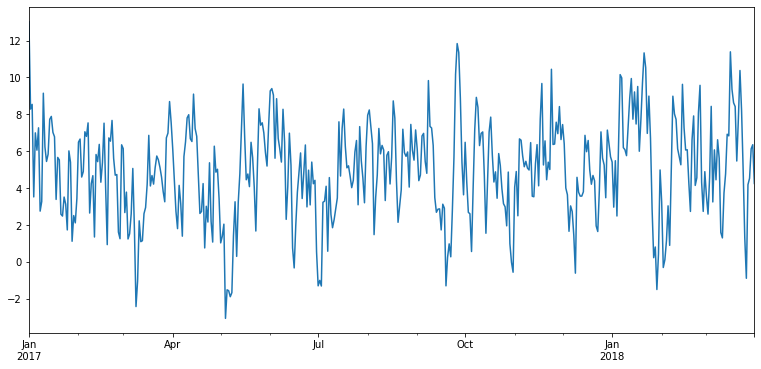

In [12]:
# plot here
ts_ar = pd.Series(ts, index=dates)

ts_ar.plot(figsize=(13,6));

## Look at the ACF and PACF of your model and write down your conclusions

We recommend to use `plot_acf` in statsmodels instead of the pandas ACF variant.

In [13]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf


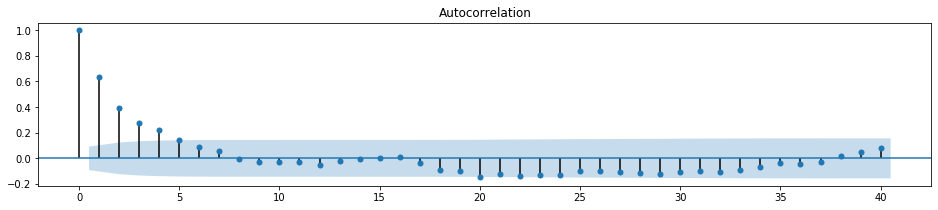

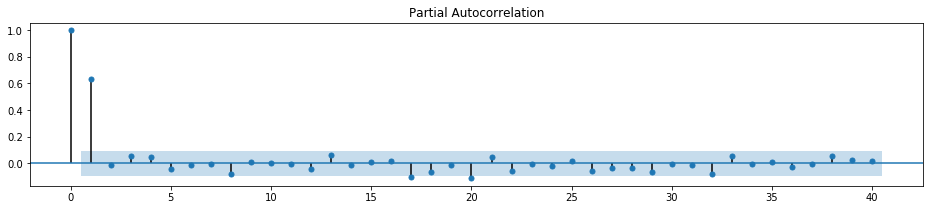

In [20]:
# ACF and PACF

fig, ax = plt.subplots(figsize=(16,3))
plot_acf(ts_ar,ax=ax, lags=40);

fig, ax = plt.subplots(figsize=(16,3))
plot_pacf(ts_ar,ax=ax, lags=40);

## Check your model with ARMA in statsmodels

Statsmodels also has a tool that fits ARMA models on time series. The only thing you have to do is provide the number of orders for AR vs MA. Have a look at the code below, and the output of the code. Make sure that the output for the $\phi$ parameter and $\mu$ is as you'd expect!

In [22]:
# assuming your time series are stored in an object "series"
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm

# Fit an MA(1) model to the first simulated data
mod_arma = ARMA(ts_ar, order=(1,0))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

# Print out the estimate for the constant and for theta
print(res_arma.params)

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  455
Model:                     ARMA(1, 0)   Log Likelihood                -968.698
Method:                       css-mle   S.D. of innovations              2.033
Date:                Wed, 20 Nov 2019   AIC                           1943.395
Time:                        23:36:48   BIC                           1955.756
Sample:                    01-01-2017   HQIC                          1948.265
                         - 03-31-2018                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9664      0.269     18.444      0.000       4.439       5.494
ar.L1.y        0.6474      0.036     17.880      0.000       0.576       0.718
                                    Roots           

## Generate an MA model of the first order with $\theta = 0.9$

Recall that the MA model has the following formula:

$$Y_t = \mu +\epsilon_t + \theta * \epsilon_{t-1}$$

This means that:

$$Y_1 = \mu + \epsilon_1+  \theta * \epsilon_{0}$$
$$Y_2 = \mu + \epsilon_2+  \theta * \epsilon_{1}$$

and so on. 

Assume a mean-zero white noise with a standard deviation of 4. Make sure you have a daily datetime index is ranging from April 2015 until the end of August 2015. Assume that $\mu=7$.

In [23]:
# keep the random seed
np.random.seed(1234)

# create a series with the specified dates
dates = pd.date_range('2015-04-01','2015-08-31')

# store the parameters
errors = np.random.normal(0,4,len(dates))
theta = 0.9
mu = 7
#generate the time series

ts = [None] * len(dates)
prev_error = 0
for i,error in enumerate(errors):
    ts[i] = mu + error + theta * prev_error
    prev_error = error

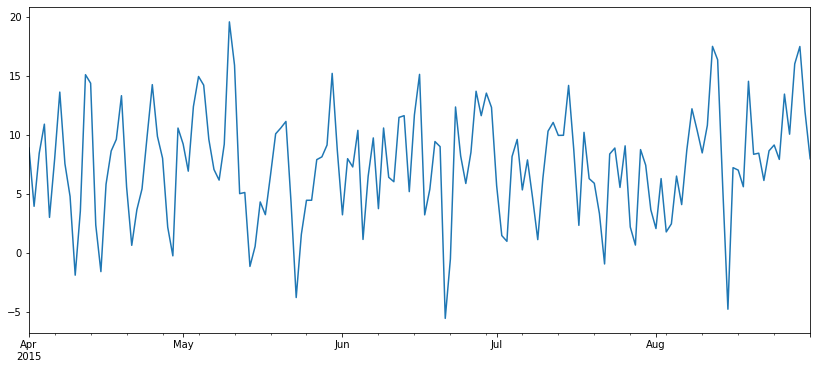

In [24]:
# Plot the time series

ts_ma = pd.Series(ts, index=dates)

ts_ma.plot(figsize=(14,6));

## Look at the ACF and PACF of your model and write down your conclusions

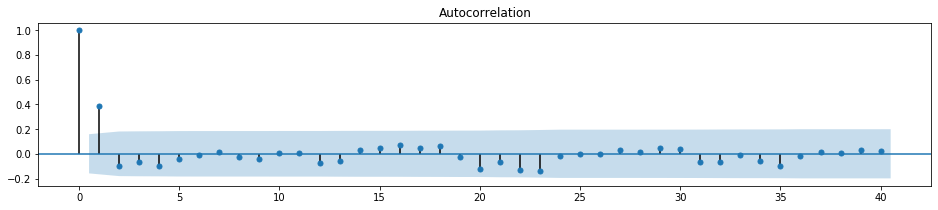

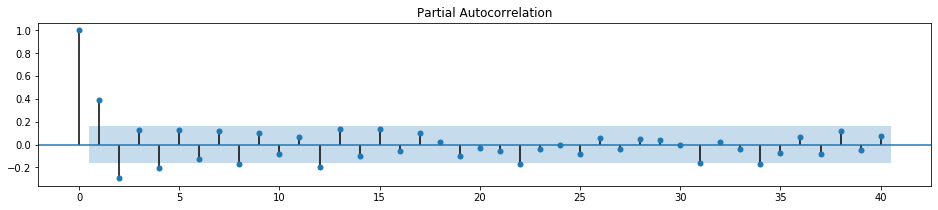

In [25]:
# plots here
# ACF and PACF

fig, ax = plt.subplots(figsize=(16,3))
plot_acf(ts_ma,ax=ax, lags=40);

fig, ax = plt.subplots(figsize=(16,3))
plot_pacf(ts_ma,ax=ax, lags=40);

## Check your model with ARMA in statsmodels

Repeat what you did for your AR model but now for your MA model to verify the parameters are estimated correctly.

In [27]:


# Fit an MA(1) model to the first simulated data
mod_arma = ARMA(ts_ma, order=(0,1))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

# Print out the estimate for the constant and for theta
print(res_arma.params)



                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  153
Model:                     ARMA(0, 1)   Log Likelihood                -425.916
Method:                       css-mle   S.D. of innovations              3.897
Date:                Thu, 21 Nov 2019   AIC                            857.832
Time:                        22:31:40   BIC                            866.924
Sample:                    04-01-2015   HQIC                           861.525
                         - 08-31-2015                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.5167      0.589     12.763      0.000       6.362       8.671
ma.L1.y        0.8753      0.050     17.634      0.000       0.778       0.973
                                    Roots           

## Create a model for the 400m data set

Import the data set containing the historical running times for the men's 400m on the Olympic games.

In [33]:
# the data is in "winning_400m.csv"
win = pd.read_csv("winning_400m.csv")
win.head()


,year,winning_times
0,1900,49.4
1,1904,49.2
2,1908,50.0
3,1912,48.2
4,1920,49.6


In [34]:
win.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 2 columns):
year             22 non-null int64
winning_times    22 non-null float64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


In [35]:
win.year = win.year.astype(str)
win.year = pd.to_datetime(win.year.astype(str))


In [36]:
win.set_index('year', inplace=True)

Plot the data

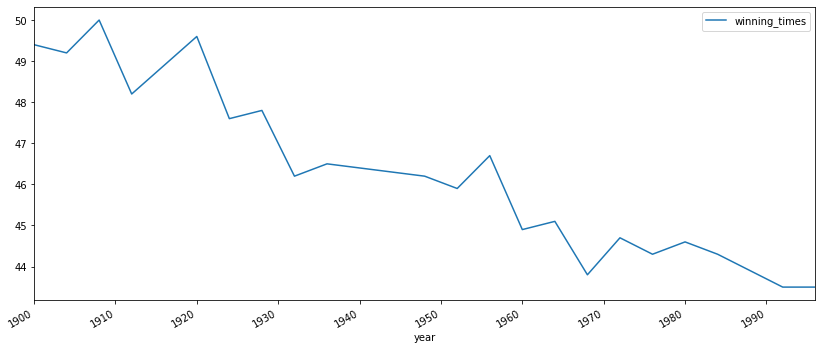

In [37]:
# your code here
win.plot(figsize=(14,6));

Difference the data to get a stationary time series. Make sure to remove the first NaN value.

In [38]:
# your code here
win_dif = win.diff(periods=1)
win_dif.dropna(inplace=True)

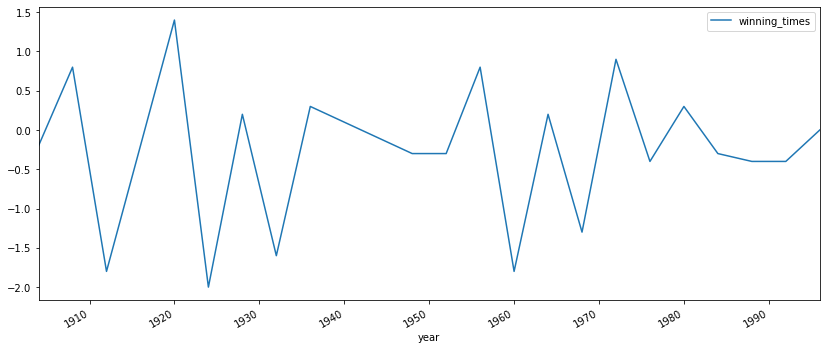

In [39]:
win_dif.plot(figsize=(14,6))

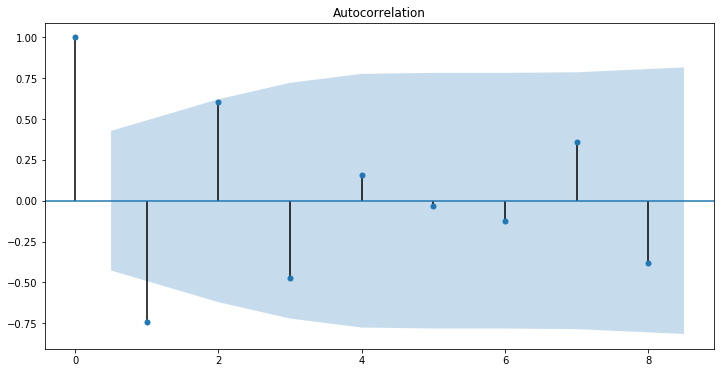

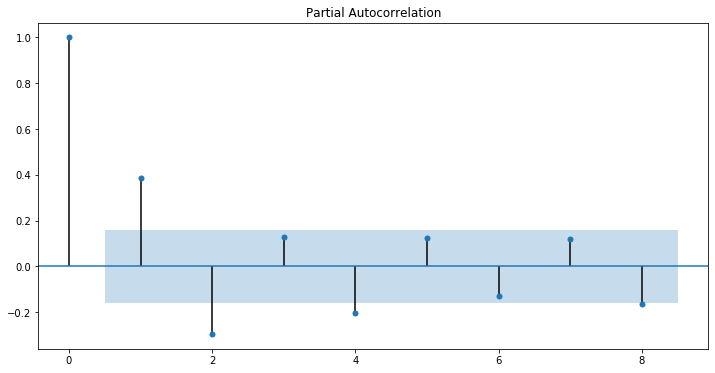

In [40]:
# Look at ACF and PACF
fig, ax = plt.subplots(figsize=(12,6))
plot_acf(win_dif,ax=ax, lags=8);

fig, ax = plt.subplots(figsize=(12,6))
plot_pacf(ts_ma,ax=ax, lags=8);

Based on the ACF and PACF, fit an arma model with the right orders for AR and MA. Feel free to try different models and compare AIC and BIC values, as well as significance values for the parameter estimates.

In [43]:
# your code here
# Print out summary information on the fit
mod_arma = ARMA(win_dif, order=(0,1))
res_arma = mod_arma.fit()

print(res_arma.summary())

# Print out the estimate for the constant and for theta
print(res_arma.params)


/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/arima_model.py:1441: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))


                              ARMA Model Results                              
Dep. Variable:          winning_times   No. Observations:                   21
Model:                     ARMA(0, 1)   Log Likelihood                 -22.654
Method:                       css-mle   S.D. of innovations              0.661
Date:                Thu, 21 Nov 2019   AIC                             51.308
Time:                        22:53:11   BIC                             54.442
Sample:                             0   HQIC                            51.988
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.3108      0.022    -13.990      0.000      -0.354      -0.267
ma.L1.winning_times    -1.0000        nan        nan        nan         nan         nan
                

/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [44]:
# Try another one
# Print out summary information on the fit
mod_arma = ARMA(win_dif, order=(1,1))
res_arma = mod_arma.fit()

print(res_arma.summary())

# Print out the estimate for the constant and for theta
print(res_arma.params)


                              ARMA Model Results                              
Dep. Variable:          winning_times   No. Observations:                   21
Model:                     ARMA(1, 1)   Log Likelihood                 -19.958
Method:                       css-mle   S.D. of innovations              0.615
Date:                Thu, 21 Nov 2019   AIC                             47.916
Time:                        22:53:25   BIC                             52.094
Sample:                             0   HQIC                            48.822
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2850      0.086     -3.298      0.004      -0.454      -0.116
ar.L1.winning_times    -0.7708      0.160     -4.826      0.000      -1.084      -0.458
ma.L1.winning_ti

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [47]:
# Print out summary information on the fit
mod_arma = ARMA(win_dif, order=(2,2))
res_arma = mod_arma.fit()

print(res_arma.summary())

# Print out the estimate for the constant and for theta
print(res_arma.params)


/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:          winning_times   No. Observations:                   21
Model:                     ARMA(2, 2)   Log Likelihood                 -16.472
Method:                       css-mle   S.D. of innovations              0.461
Date:                Thu, 21 Nov 2019   AIC                             44.943
Time:                        22:58:36   BIC                             51.210
Sample:                             0   HQIC                            46.303
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2718      0.098     -2.779      0.013      -0.463      -0.080
ar.L1.winning_times    -1.7575      0.097    -18.070      0.000      -1.948      -1.567
ar.L2.winning_ti

## What is your final model? Why did you pick this model?

In [ ]:
# Your comments here

#arma(2,2)

## Summary

Great! Now that you know the ins and outs of ARMA models and you've practiced your modeling knowledge.